In [45]:
from itertools import count
from PIL import Image
import numpy as np

In [46]:
img = Image.open("Andrew-Ng.jpg",'r')

In [48]:
a = np.array(img)

In [49]:
a.shape

(2485, 3600, 3)

In [50]:
R0 = a[:,:,0]
G0 = a[:,:,1]
B0 = a[:,:,2]

In [51]:
R0.shape, G0.shape, B0.shape

((2485, 3600), (2485, 3600), (2485, 3600))

In [52]:
Sigma = np.diag(s)

In [73]:
def img_compress(img,k):
    U,s,VT=np.linalg.svd(img)
    Sigma = np.diag(s)
    D = U[:,:k]@Sigma[:k,:k]@VT[:k,:]
    D[D<0] = 0
    D[D>255] = 255
    return np.rint(D).astype('uint8')

In [74]:
  R = img_compress(R0,100)
  G = img_compress(G0,100)
  B = img_compress(B0,100)

In [75]:
re_img = np.stack((R,G,B),2)

In [76]:
Image.fromarray(re_img).save("compress.jpg")

In [77]:
img2 = Image.open("compress.jpg")

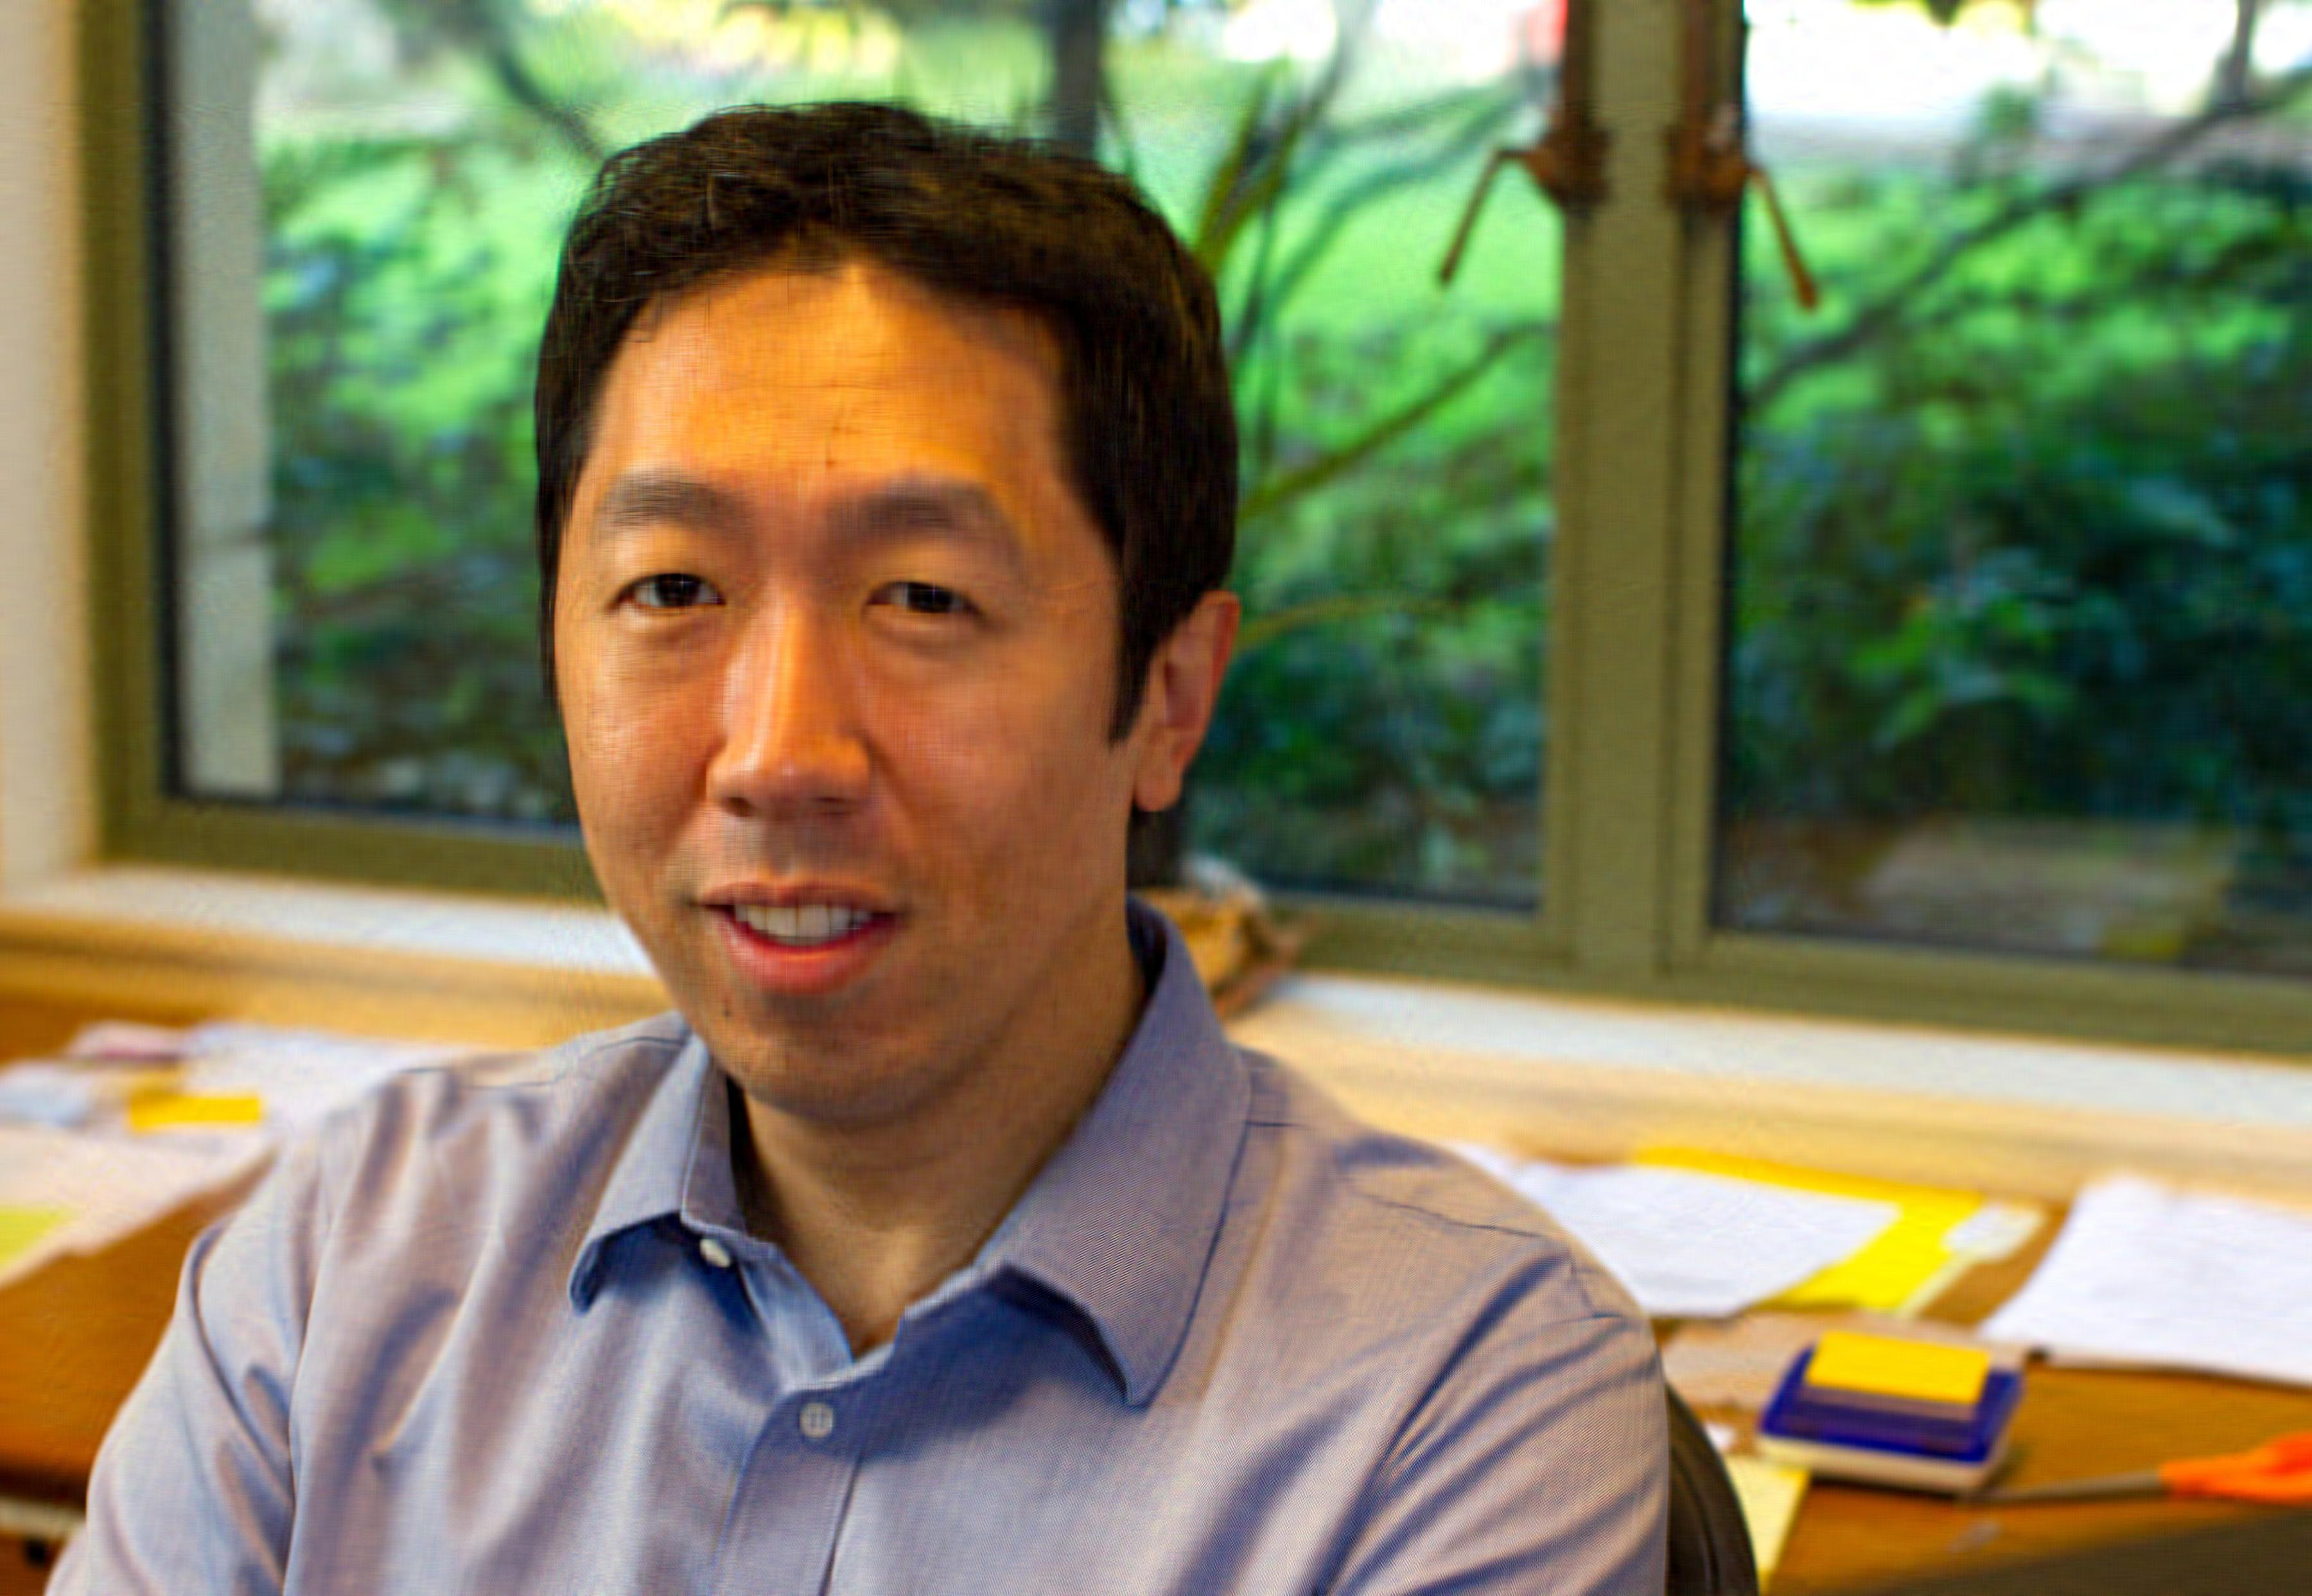

In [78]:
img2